## Naïve Bayes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
from numpy.random import seed # To get reproducible results
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed # Tensorflow seed
set_seed(18)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pickle
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('../Data/RoadAccident.csv')
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))
X = data.drop(columns='Accident_Severity')
numerical_features = list()
categorical_features = list()
for column in X.columns:
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (data[column].dtype == 'object'):
        categorical_features.append(column)
y = data['Accident_Severity']
X = X.drop(columns=['Accident_Index','Datetime'])
discrete_features = ['Driver_IMD_Decile','Speed_limit','Year','Season','Month_of_Year','Day_of_Month','Day_of_Week','Number_of_Vehicles','Age_of_Driver']
for item in discrete_features:
    numerical_features.remove(item)
    categorical_features.append(item)
numerical_features.remove('Accident_Index')
categorical_features.remove('Datetime')

The dataset contains 3 different data types and they are: object, float64, int64


In [3]:
X.head()

,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,High_Wind,Lights,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre
0,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,Fine,No,Daylight,2010,4,1,19,2,0.729,2,7,8,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead
1,51.499635,-0.209915,London,Urban,A,3,30,Single carriageway,Dry,Fine,No,Daylight,2010,4,2,8,1,0.475,2,5,2,More than 4 arms (not roundabout),Mid Junction - on roundabout or on main road,Offside,Other/Not known,2987,Heavy oil,Mercedes,Car,Waiting to go
2,51.492515,-0.168130,London,Urban,Unclassified,5,30,Single carriageway,Dry,Fine,No,Daylight,2010,4,3,3,3,0.267,2,5,11,Crossroads,Mid Junction - on roundabout or on main road,Front,Journey as part of work,998,Petrol,Nissan,Car,Going ahead
3,51.504784,-0.193863,London,Urban,A,2,30,Single carriageway,Dry,Fine,No,Daylight,2010,4,3,4,4,0.566,2,3,5,T or staggered junction,Mid Junction - on roundabout or on main road,Offside,Journey as part of work,2179,Heavy oil,Citroen,Van,Turning right
4,51.522072,-0.212927,London,Urban,B,3,30,Single carriageway,Wet or damp,Fine,No,Daylight,2010,4,3,12,5,0.670,1,4,4,T or staggered junction,Approaching junction or waiting/parked at junc...,Nearside,Journey as part of work,2198,Heavy oil,Ford,Van,Overtaking


In [4]:
y.head()

0    Slight
1    Slight
2    Slight
3    Slight
4    Slight
Name: Accident_Severity, dtype: object

In [5]:
categorical_features_index = list()
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])
X.head()
y = LabelEncoder().fit_transform(y)

In [6]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 18)

In [7]:
mixed_nb_alpha = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]
mixedNB_validation_misclassification_rates = list()
for alpha in mixed_nb_alpha:
    mixedNB = GaussianNB()
    mixedNB.fit(X_train,y_train)
    y_hat_valid = mixedNB.predict(X_valid)
    mixedNB_validation_misclassification_rates.append(sum(y_hat_valid != y_valid)/ len(y_valid))

In [8]:
bestK_mixedNB = np.argmin(mixedNB_validation_misclassification_rates) + 1
print("The best K value is: {}".format(bestK_mixedNB))

The best K value is: 1


In [9]:
mixedNB_best_model = GaussianNB()
mixedNB_best_model.fit(X_train_valid,y_train_valid)

GaussianNB()

In [10]:
from sklearn import metrics
y_pred = mixedNB_best_model.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The classification accuracy on the testing set is: {:.2%}".format(np.mean(mixedNB_best_model.predict(X_test) == y_test)))

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.23      0.30      4712
           1       0.78      0.89      0.83     14176

    accuracy                           0.73     18888
   macro avg       0.60      0.56      0.57     18888
weighted avg       0.69      0.73      0.70     18888

The classification accuracy on the testing set is: 72.92%


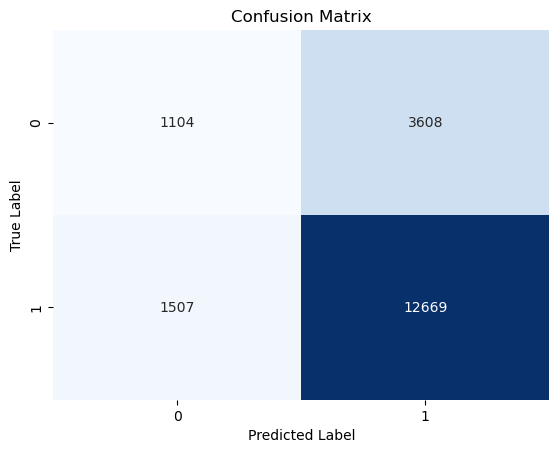

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

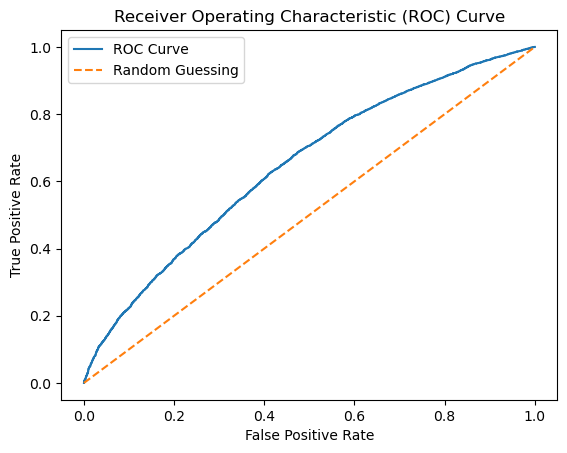

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, mixedNB_best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], "--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()